In [11]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [12]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

In [13]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


# Adquisición de los datos

In [14]:
# Cargo los archivos de los partidos mediante la instrucción '.read_csv' de Pandas
# Almaceno cada uno de los archivos en una variable

tabla = pd.read_excel ('Teams_Liga_iberdrola_Stats_90.xlsx')
tabla

,Team,Goals,Chances,Chances successful,Fouls,Yellow cards,Red cards,Offsides,Corners,Shots,...,"Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %","Pressing efficiency, %","Ball possession, %"
0,Eibar,0.903226,3.354839,0.903226,13.838710,1.741935,0.129032,2.000000,3.225806,9.064516,...,22,48,52,43,49,51,54,67,49,42
1,Athletic,1.322581,5.032258,1.322581,13.290323,1.225806,0.000000,2.548387,3.935484,10.064516,...,25,52,57,47,54,56,59,77,51,51
2,Atletico Madrid,1.785714,7.214286,1.785714,11.166667,1.452381,0.023810,3.452381,7.571429,14.738095,...,30,51,55,47,53,58,58,82,59,60
3,FC Barcelona,4.530612,13.530612,4.530612,8.408163,0.795918,0.020408,3.306122,8.551020,23.714286,...,31,55,57,53,58,65,60,88,66,67
4,Deportivo,1.156250,4.437500,1.156250,11.187500,1.406250,0.031250,1.562500,5.625000,10.562500,...,24,48,54,43,52,50,57,72,54,47
5,Deportivo,1.156250,4.437500,1.156250,11.187500,1.406250,0.031250,1.562500,5.625000,10.562500,...,24,48,54,43,52,50,57,72,54,47
6,Espanyol,0.884615,3.500000,0.884615,13.192308,1.923077,0.153846,2.615385,3.038462,8.384615,...,23,49,54,43,49,52,56,68,48,38
7,Granadilla,1.612903,5.677419,1.612903,12.354839,1.838710,0.032258,3.741935,5.258065,11.354839,...,23,49,55,43,52,50,57,73,54,49
8,Levante,1.972222,7.083333,1.944444,9.861111,1.194444,0.027778,3.305556,5.277778,14.583333,...,30,54,58,49,55,61,60,81,53,53
9,Logrono,0.914286,3.428571,0.914286,13.600000,1.685714,0.171429,1.942857,3.914286,9.342857,...,21,48,52,43,47,52,52,72,48,45


In [15]:
tabla.set_index('Team', inplace = True)
tabla.head()

,Goals,Chances,Chances successful,Fouls,Yellow cards,Red cards,Offsides,Corners,Shots,Shots on target,...,"Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %","Pressing efficiency, %","Ball possession, %"
Team,,,,,,,,,,,,,,,,,,,,,
Eibar,0.903226,3.354839,0.903226,13.838710,1.741935,0.129032,2.000000,3.225806,9.064516,3.806452,...,22,48,52,43,49,51,54,67,49,42
Athletic,1.322581,5.032258,1.322581,13.290323,1.225806,0.000000,2.548387,3.935484,10.064516,4.580645,...,25,52,57,47,54,56,59,77,51,51
Atletico Madrid,1.785714,7.214286,1.785714,11.166667,1.452381,0.023810,3.452381,7.571429,14.738095,6.666667,...,30,51,55,47,53,58,58,82,59,60
FC Barcelona,4.530612,13.530612,4.530612,8.408163,0.795918,0.020408,3.306122,8.551020,23.714286,11.632653,...,31,55,57,53,58,65,60,88,66,67
Deportivo,1.156250,4.437500,1.156250,11.187500,1.406250,0.031250,1.562500,5.625000,10.562500,4.375000,...,24,48,54,43,52,50,57,72,54,47


# Radar charts

In [18]:
# Elimino las columnas de datos que no son relevantes para realizar los radar charts

tabla_radar = tabla.drop (['Number of games'], axis=1)
tabla_radar.head()

,Goals,Chances,Chances successful,Fouls,Yellow cards,Red cards,Offsides,Corners,Shots,Shots on target,...,"Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %","Pressing efficiency, %","Ball possession, %"
Team,,,,,,,,,,,,,,,,,,,,,
Eibar,0.903226,3.354839,0.903226,13.838710,1.741935,0.129032,2.000000,3.225806,9.064516,3.806452,...,22,48,52,43,49,51,54,67,49,42
Athletic,1.322581,5.032258,1.322581,13.290323,1.225806,0.000000,2.548387,3.935484,10.064516,4.580645,...,25,52,57,47,54,56,59,77,51,51
Atletico Madrid,1.785714,7.214286,1.785714,11.166667,1.452381,0.023810,3.452381,7.571429,14.738095,6.666667,...,30,51,55,47,53,58,58,82,59,60
FC Barcelona,4.530612,13.530612,4.530612,8.408163,0.795918,0.020408,3.306122,8.551020,23.714286,11.632653,...,31,55,57,53,58,65,60,88,66,67
Deportivo,1.156250,4.437500,1.156250,11.187500,1.406250,0.031250,1.562500,5.625000,10.562500,4.375000,...,24,48,54,43,52,50,57,72,54,47


In [19]:
# Vuelvo a normalizar los datos pero esta vez con 'tabla' que mantiene los nombres como indice

df_normalizado_radar = (tabla_radar - tabla_radar.min()) / (tabla_radar.max() - tabla_radar.min())
df_normalizado_radar.head()

,Goals,Chances,Chances successful,Fouls,Yellow cards,Red cards,Offsides,Corners,Shots,Shots on target,...,"Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %","Pressing efficiency, %","Ball possession, %"
Team,,,,,,,,,,,,,,,,,,,,,
Eibar,0.066971,0.036962,0.066971,0.891446,0.733463,0.752688,0.177347,0.119948,0.129101,0.100858,...,0.1,0.125,0.142857,0.090909,0.357143,0.1250,0.250,0.275862,0.227273,0.264706
Athletic,0.174837,0.195713,0.174837,0.801426,0.333299,0.000000,0.399644,0.237230,0.188549,0.189804,...,0.4,0.625,0.857143,0.454545,0.714286,0.4375,0.875,0.620690,0.318182,0.529412
Atletico Madrid,0.293963,0.402221,0.293963,0.452820,0.508966,0.138889,0.766092,0.838111,0.466384,0.429465,...,0.9,0.500,0.571429,0.454545,0.642857,0.5625,0.750,0.793103,0.681818,0.794118
FC Barcelona,1.000000,1.000000,1.000000,0.000000,0.000000,0.119048,0.706804,1.000000,1.000000,1.000000,...,1.0,1.000,0.857143,1.000000,1.000000,1.0000,1.000,1.000000,1.000000,1.000000
Deportivo,0.132054,0.139425,0.132054,0.456240,0.473200,0.182292,0.000000,0.516442,0.218153,0.166178,...,0.3,0.125,0.428571,0.090909,0.571429,0.0625,0.625,0.448276,0.454545,0.411765


In [20]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = tabla_radar.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

['Goals',
 'Chances',
 'Chances successful',
 'Fouls',
 'Yellow cards',
 'Red cards',
 'Offsides',
 'Corners',
 'Shots',
 'Shots on target',
 'Passes',
 'Key passes',
 'Key passes accurate',
 'Crosses',
 'Challenges',
 'Defensive challenges',
 'Attacking challenges',
 'Air challenges',
 'Dribbles',
 'Tackles',
 'Lost balls',
 'Lost balls in own half',
 'Ball recoveries',
 "Ball recoveries in opponent's half",
 'Team pressing',
 "Entrances on opponent's half",
 "Entrances on final third of opponent's half",
 "Entrances to the opponent's box",
 'Matches played',
 'Chances, % of conversion',
 'Accurate crosses, %',
 'Challenges won, %',
 'Challenges in defence won, %',
 'Challenges in attack won, %',
 'Air challenges won, %',
 'Successful dribbles, %',
 'Tackles won, %',
 'Accurate passes, %',
 'Pressing efficiency, %',
 'Ball possession, %']

In [21]:
len(lista_nombres_columnas)

40

# Defensivo

In [28]:
def radar_chart_DEFENSIVO (name_team):
    

    features = ['Fouls','Yellow cards','Red cards', 'Defensive challenges','Tackles',
                'Lost balls in own half','Ball recoveries',"Ball recoveries in opponent's half"]
    
    features_data = [df_normalizado_radar.loc [name_team,'Fouls'],
                     df_normalizado_radar.loc [name_team,'Yellow cards'],
                     df_normalizado_radar.loc [name_team,"Red cards"], 
                     df_normalizado_radar.loc [name_team,'Defensive challenges'],
                     df_normalizado_radar.loc [name_team,'Tackles'],
                     df_normalizado_radar.loc [name_team,"Lost balls in own half"], 
                     df_normalizado_radar.loc [name_team,'Ball recoveries'],
                     df_normalizado_radar.loc [name_team,"Ball recoveries in opponent's half"]]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

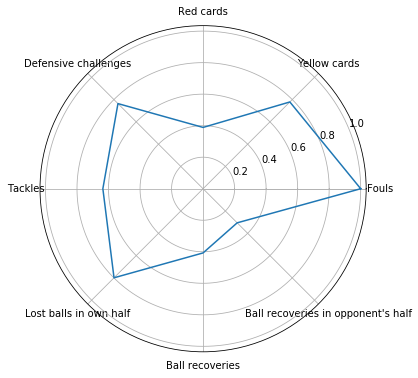

In [29]:
radar_chart_DEFENSIVO ('Real Betis')

In [32]:
def radar_chart_ATAQUE (name_team):
    

    features = ['Goals', 'Chances','Chances successful','Shots','Shots on target',"Entrances on opponent's half",
                "Entrances on final third of opponent's half","Entrances to the opponent's box"]
    
    features_data = [df_normalizado_radar.loc [name_team,'Goals'],
                     df_normalizado_radar.loc [name_team,'Chances'],
                     df_normalizado_radar.loc [name_team,"Chances successful"], 
                     df_normalizado_radar.loc [name_team,'Shots'],
                     df_normalizado_radar.loc [name_team,'Shots on target'],
                     df_normalizado_radar.loc [name_team,"Entrances on opponent's half"], 
                     df_normalizado_radar.loc [name_team,"Entrances on final third of opponent's half"],
                     df_normalizado_radar.loc [name_team,"Entrances to the opponent's box"]]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

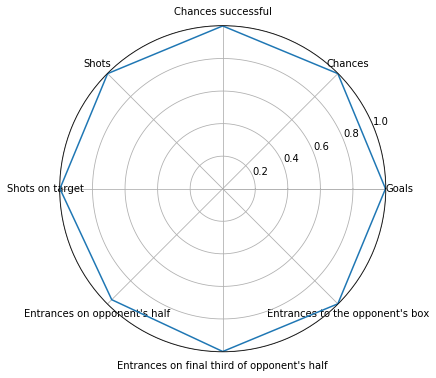

In [33]:
radar_chart_ATAQUE ('FC Barcelona')

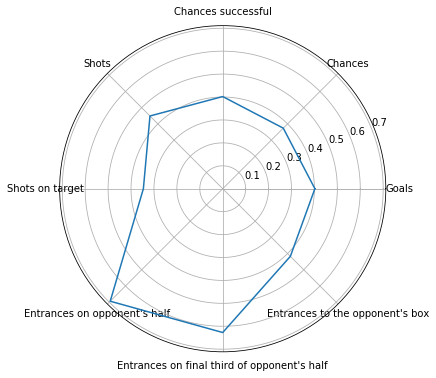

In [36]:
radar_chart_ATAQUE ('Real Madrid')

In [37]:
def radar_chart_PERCENTAGES (name_team):
    

    features = ["Accurate crosses, %",'Crosses','Challenges won, %', 'Challenges','Challenges in attack won, %', 
                'Attacking challenges','Air challenges won, %','Air challenges']
    
    features_data = [df_normalizado_radar.loc [name_team,"Accurate crosses, %"],
                     df_normalizado_radar.loc [name_team,'Crosses'],
                     df_normalizado_radar.loc [name_team,"Challenges won, %"], 
                     df_normalizado_radar.loc [name_team,'Challenges'],
                     df_normalizado_radar.loc [name_team,'Challenges in attack won, %'],
                     df_normalizado_radar.loc [name_team,"Attacking challenges"], 
                     df_normalizado_radar.loc [name_team,'Air challenges won, %'],
                     df_normalizado_radar.loc [name_team,'Air challenges']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

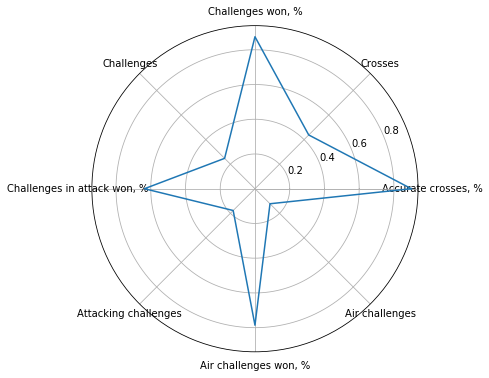

In [38]:
radar_chart_PERCENTAGES ('Levante')

In [39]:
def radar_chart_PERCENTAGES2 (name_team):
    

    features = [ 'Chances, % of conversion','Challenges in defence won, %','Successful dribbles, %', 'Dribbles',
                'Tackles won, %','Accurate passes, %','Pressing efficiency, %','Ball possession, %']
    
    features_data = [df_normalizado_radar.loc [name_team,'Chances, % of conversion'],
                     df_normalizado_radar.loc [name_team,'Challenges in defence won, %'],
                     df_normalizado_radar.loc [name_team,"Successful dribbles, %"], 
                     df_normalizado_radar.loc [name_team,'Dribbles'],
                     df_normalizado_radar.loc [name_team,'Tackles won, %'],
                     df_normalizado_radar.loc [name_team,"Accurate passes, %"], 
                     df_normalizado_radar.loc [name_team,"Pressing efficiency, %"],
                     df_normalizado_radar.loc [name_team,"Ball possession, %"]]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

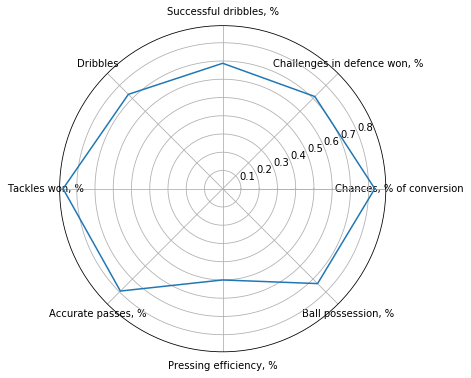

In [41]:
radar_chart_PERCENTAGES2 ('Real Madrid')

In [42]:
def radar_chart_OTHERS (name_team):
    

    features = [ 'Offsides','Corners','Passes','Key passes','Key passes accurate','Lost balls','Team pressing', 'Goals']
    
    features_data = [df_normalizado_radar.loc [name_team,'Offsides'],
                     df_normalizado_radar.loc [name_team,'Corners'],
                     df_normalizado_radar.loc [name_team,"Passes"], 
                     df_normalizado_radar.loc [name_team,'Key passes'],
                     df_normalizado_radar.loc [name_team,'Key passes accurate'],
                     df_normalizado_radar.loc [name_team,"Lost balls"], 
                     df_normalizado_radar.loc [name_team,'Team pressing'],
                     df_normalizado_radar.loc [name_team,"Goals"]]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

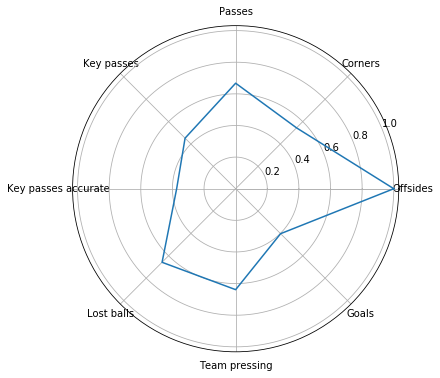

In [43]:
radar_chart_OTHERS ('Real Madrid')